In [1]:
import sys
sys.path.append(r"C:\Users\hjia9\Documents\GitHub\data-analysis")
sys.path.append(r"C:\Users\hjia9\Documents\GitHub\data-analysis\ucla-lapd")

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, IntSlider

import read_hdf5 as rh
from Jan2024_Isat import init_read, get_Isat_ratio
from bapsflib import lapd


%matplotlib widget
plt.rcParams.update({'font.size': 16})

In [14]:
ifn = r"C:\data\LAPD\JAN2024_diverging_B\02_2cmXYplane_M1P24_M3P27_2024-01-25_21.10.28.hdf5"

with lapd.File(ifn) as f:
    rh.show_info(f)

pr_area = {
    'M3': np.array([1,1,1,1.15]) * 0.2*0.4,
    'M1': np.array([1,1,1.14,1]) * 0.1*0.4
} # [UL, UR, LL, LR] ; unit:cm^2

02_2cmXYplane_M1P24_M3P27_2024-01-25_21.10.28.hdf5 Overview
Generated by bapsflib (v0.0.0)
Generated date: 8/20/2024 4:34:04 PM


Filename:     02_2cmXYplane_M1P24_M3P27_2024-01-25_21.10.28.hdf5
Abs. Path:    C:\data\LAPD\JAN2024_diverging_B\02_2cmXYplane_M1P24_M3P27_2024-01-25_21.10.28.hdf5
LaPD version: 1.2
Investigator: Jia Han
Run Date:     1/25/2024 8:38:36 PM

Exp. and Run Structure:
  (set)  Plasma_Flow
  (exp)  +-- JAN2024_diverging_B
  (run)  |   +-- 02_2cmXYplane_M1P24_M3P27

Run Description:
    corse XY-plane with 4-tip mach probe under gradient field plasma condition.
    2 probe Port 24 and 27, upper tips Isat, lower tips sweep
    
    LAPD B field:
    Black magnets at south:(PS12-13: 555A)  1 kG
    Yellow 1,2: 1kG (2600A)
    Magenta 5-7: 	1kG (910A)
    Magenta 8-10: 400G (350A)
    Yellow 3,4: 400G (1000A)
    Black magnet at north PS11: (0 A) 	0.0 kG
    
    South LaB6 source:
    H plasma (150 on MFC dial)
    He gas puff using Piezo near south anode (~1" size cu

SIS Crate activated:
3302 board 1
Channel 1 -- active: TRUE -- description: p27_M3_UL
Channel 2 -- active: TRUE -- description: p27_M3_UR
Channel 3 -- active: TRUE -- description: p27_M3_LL
Channel 4 -- active: TRUE -- description: p27_M3_LR
Channel 5 -- active: FALSE -- description:  
Channel 6 -- active: FALSE -- description:  
Channel 7 -- active: TRUE -- description: Vsweep_supply
Channel 8 -- active: FALSE -- description:  
3302 board 2
Channel 1 -- active: TRUE -- description: p24_M1_UL
Channel 2 -- active: TRUE -- description: p24_M1_UR
Channel 3 -- active: TRUE -- description: p24_M1_LL
Channel 4 -- active: TRUE -- description: p24_M1_LR
Channel 5 -- active: FALSE -- description:  
Channel 6 -- active: FALSE -- description:  
Channel 7 -- active: FALSE -- description:  
Channel 8 -- active: FALSE -- description:  
2 probes found.
Langmuir Marvin_3  at port  27
Only one motion list found: XY-dx2cm-dy2cm-Nx21-Ny21
Number of positions: 441


c:\Users\hjia9\Documents\GitHub\data-analysis\.venv\Lib\site-packages\bapsflib-0.0.0-py3.11.egg\bapsflib\_hdf\utils\hdfreadcontrols.py:315: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = np.empty(shape, dtype=dtype)


Number of shots per position: 11
This probe moves first in the data run sequence
Langmuir Marvin_1  at port  24
Only one motion list found: XY-dx2cm-dy2cm-Nx21-Ny21
Number of positions: 441


c:\Users\hjia9\Documents\GitHub\data-analysis\.venv\Lib\site-packages\bapsflib-0.0.0-py3.11.egg\bapsflib\_hdf\utils\hdfreadcontrols.py:315: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = np.empty(shape, dtype=dtype)


Number of shots per position: 11
This probe moves after previous probe finish taking data


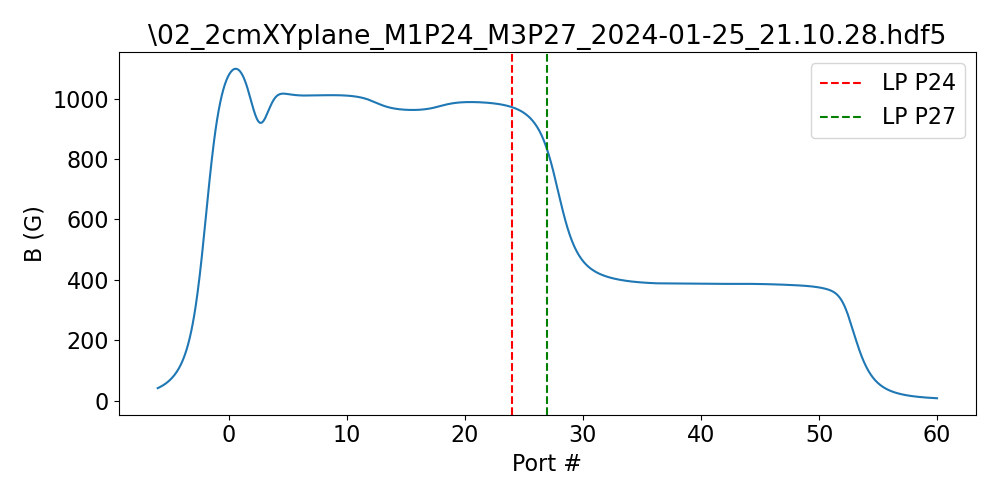

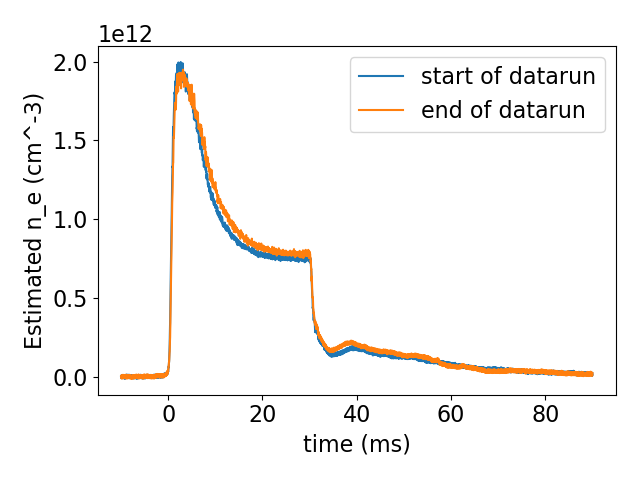

In [15]:
# Reads and initializes data.
adc, digi_dict, pos_array, xpos, ypos, zpos, npos, nshot, int_arr, int_tarr = init_read(ifn)

In [16]:
# Isat data and ratio
with lapd.File(ifn) as f:
    tarr, Isat_UL_dic, Isat_UR_dic, I_ratio = get_Isat_ratio(f, adc, digi_dict, npos, nshot, pr_area, 1,2,R=[9.7,9.7], bg_tind=60000)

c:\Users\hjia9\Documents\GitHub\data-analysis\.venv\Lib\site-packages\bapsflib-0.0.0-py3.11.egg\bapsflib\_hdf\utils\hdfreadcontrols.py:315: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = np.empty(shape, dtype=dtype)
c:\Users\hjia9\Documents\GitHub\data-analysis\.venv\Lib\site-packages\bapsflib-0.0.0-py3.11.egg\bapsflib\_hdf\utils\hdfreaddata.py:508: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = np.empty(shape, dtype=dtype)
c:\Users\hjia9\Documents\GitHub\data-analysis\.venv\Lib\site-packages\bapsflib-0.0.0-py3.11.egg\bapsflib\_hdf\utils\hdfreadcontrols.py:315: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = np.empty(shap

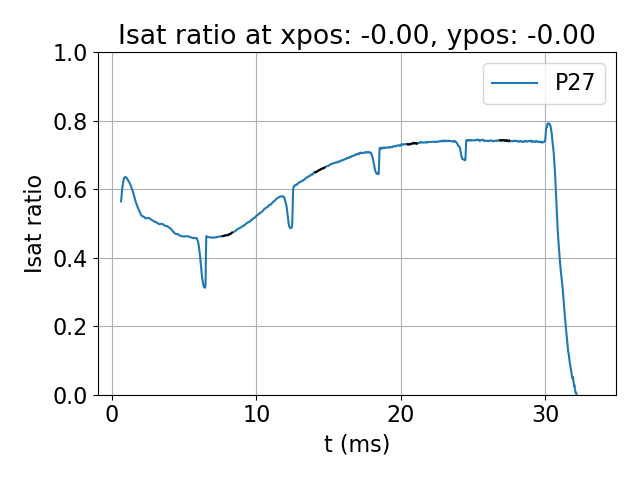

In [17]:
start_ls = [1000, 12000, 22000, 32000, 42000]
stop_ls = [52000, 13000, 23000, 33000, 43000]
pos_ind = int(npos/2)
pos = list(pos_array[1][pos_ind*nshot])

plt.figure()
plt.title(f'Isat ratio at xpos: {pos[0]:.2f}, ypos: {pos[1]:.2f}')
plt.xlabel('t (ms)')
plt.ylabel('Isat ratio')

plt.plot(tarr[start_ls[0]:stop_ls[0]]*1e3, I_ratio[1][pos_ind,start_ls[0]:stop_ls[0]], label='P27')
# plt.plot(tarr[start_ls[0]:stop_ls[0]]*1e3, I_ratio[2][pos_ind,start_ls[0]:stop_ls[0]], label='P24')

plt.ylim([0, 1])

plt.legend()
plt.grid(True)
plt.tight_layout()

for i in range(1, 5):
    plt.plot(tarr[start_ls[i]:stop_ls[i]]*1e3, I_ratio[1][pos_ind,start_ls[i]:stop_ls[i]], color='black')
    # plt.plot(tarr[start_ls[i]:stop_ls[i]]*1e3, I_ratio[2][pos_ind,start_ls[i]:stop_ls[i]], color='black')

interactive(children=(IntSlider(value=0, description='tndx', max=67583), Output()), _dom_classes=('widget-inte…

<function __main__.update_plot(tndx)>

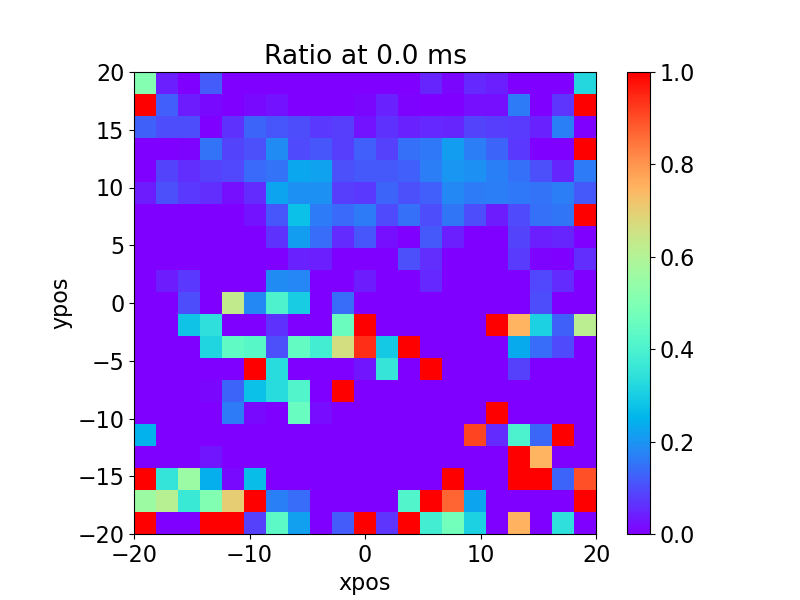

In [20]:
# Ratio interactive plot
npos, nshot, nt = Isat_UL_dic[1].shape
Isat_arr = I_ratio[1].reshape(len(ypos),len(xpos),nt)

vmin = 0 # np.min(Isat_arr)
vmax = 1 # np.max(Isat_arr) / 2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(Isat_arr[:,:,0], origin='lower', extent=[xpos[0], xpos[-1], ypos[0], ypos[-1]], vmin=vmin, vmax=vmax, cmap='rainbow')
ax.set_xlabel('xpos')
ax.set_ylabel('ypos')
fig.colorbar(im, ax=ax)

def update_plot(tndx):
    im.set_data(Isat_arr[:, :, tndx])
    ax.set_title(f'Ratio at {round(tarr[tndx]*1e3,1)} ms')
    fig.canvas.draw_idle()

# Create an interactive slider
interact(update_plot, tndx=IntSlider(min=0, max=nt-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='tndx', max=67583), Output()), _dom_classes=('widget-inte…

<function __main__.update_plot(tndx)>

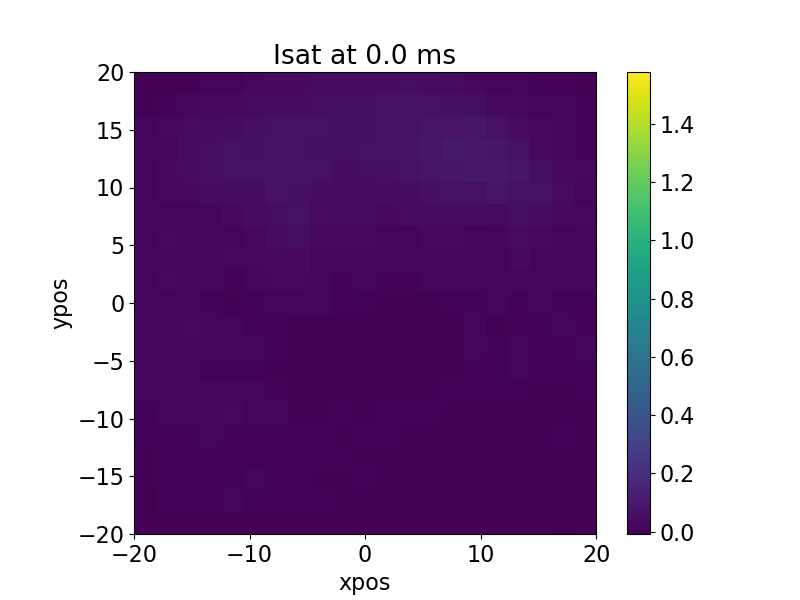

In [19]:
# Isat interactive plot
npos, nshot, nt = Isat_UL_dic[1].shape
Isat_arr = np.mean(Isat_UL_dic[1],axis=1).reshape(len(ypos),len(xpos),nt)

vmin = np.min(Isat_arr)
vmax = np.max(Isat_arr)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(Isat_arr[:,:,0], origin='lower', extent=[xpos[0], xpos[-1], ypos[0], ypos[-1]], vmin=vmin, vmax=vmax)
ax.set_xlabel('xpos')
ax.set_ylabel('ypos')
fig.colorbar(im, ax=ax)

def update_plot(tndx):
    im.set_data(Isat_arr[:, :, tndx])
    ax.set_title(f'Isat at {round(tarr[tndx]*1e3,1)} ms')
    fig.canvas.draw_idle()

# Create an interactive slider
interact(update_plot, tndx=IntSlider(min=0, max=nt-1, step=1, value=0))

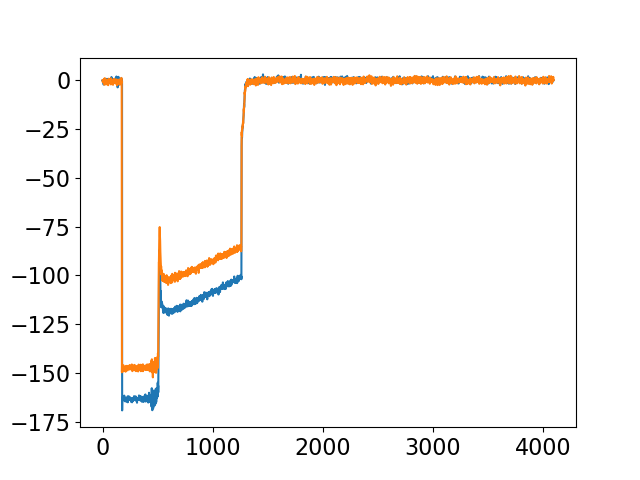

In [32]:
with lapd.File(ifn) as f:
    mdata = f.read_msi('Discharge')
    dis_V = mdata['voltage']
    dis_I = mdata['current']
    
plt.figure()
plt.plot(dis_V[0])
plt.plot(dis_V[1])